In [5]:
# Read data from 
import pandas as pd
binary= pd.read_csv('http://dni-institute.in/blogs/wp-content/uploads/2017/07/dt_data.csv')
binary.head()

,Card_Cust_ID,Gender,Education_level,Unnamed: 3,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,NaN,160,200,1
1,1000002,F,University,NaN,250,190,0
2,1000003,F,University,NaN,470,530,0
3,1000004,F,University,NaN,830,800,0
4,1000005,M,University,NaN,750,480,0


In [6]:
binary.describe()

,Card_Cust_ID,Unnamed: 3,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
count,4.750000e+02,0.0,475.000000,475.000000,475.000000
mean,1.002555e+06,NaN,602.147368,602.042105,0.263158
std,4.481438e+03,NaN,343.098348,343.130657,0.440812
min,1.000001e+06,NaN,10.000000,10.000000,0.000000
25%,1.000130e+06,NaN,310.000000,305.000000,0.000000
50%,1.000253e+06,NaN,600.000000,600.000000,0.000000
75%,1.000382e+06,NaN,900.000000,900.000000,1.000000
max,1.011114e+06,NaN,1190.000000,1200.000000,1.000000


In [7]:
# Columns
binary.dtypes.index
# Drop a column
binary.drop('Unnamed: 3', axis=1, inplace=True)
# Target Variable to be made {-1, 1}
binary.Spend_Drop_over50pct.replace([0, 1], ['A', 'B'], inplace=True)

# Print a few rows
binary.head()



,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,160,200,B
1,1000002,F,University,250,190,A
2,1000003,F,University,470,530,A
3,1000004,F,University,830,800,A
4,1000005,M,University,750,480,A


In [8]:
# Count Target Variable Values
binary.Spend_Drop_over50pct.value_counts()
# Find % Values of Target Variable Levels
round(binary.Spend_Drop_over50pct.value_counts()*100/len(binary.axes[0]),2)

A    73.68
B    26.32
Name: Spend_Drop_over50pct, dtype: float64

In [10]:
# No module named 'sklearn.cross_validation'
# Split sample into Train and Test
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

Train,Test = train_test_split(binary, test_size = 0.3, random_state = 176)
# Print a few rows
Train.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
34,1000037,M,Graduate,20,30,B
335,1000361,M,University,790,780,A
439,1011077,M,High School,1190,1190,A
4,1000005,M,University,750,480,A
169,1000183,M,University,460,400,B


In [51]:
# Note on "random_state"


df = Train.loc[:,['Last_Month_spend','Last_3m_avg_spend']]
df.axes

[Int64Index([ 34, 335, 439,   4, 169,  31,  61, 239, 289,  50,
             ...
             220,  96, 399, 380, 448, 408, 324, 245, 189, 320],
            dtype='int64', length=332),
 Index(['Last_Month_spend', 'Last_3m_avg_spend'], dtype='object')]

In [30]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 3:5]
Train_TargetVar = Train.values[:,5]

In [13]:
# Load library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [65]:
from sklearn.feature_selection import RFE

# RFE with 10 features

rfe_10 = RFE(dt_train_gini,3)
#print(rfe_10)


# Get numerical feature importances
importances = list(dt_train_gini.feature_importances_)
print(importances)

# List of tuples with variable and importance
#feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(df.axes, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#for pair,xyz in feature_importances:
#    print(xyz)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair,xyz in feature_importances]

[0.6297805290500129, 0.37021947094998703]


In [14]:
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

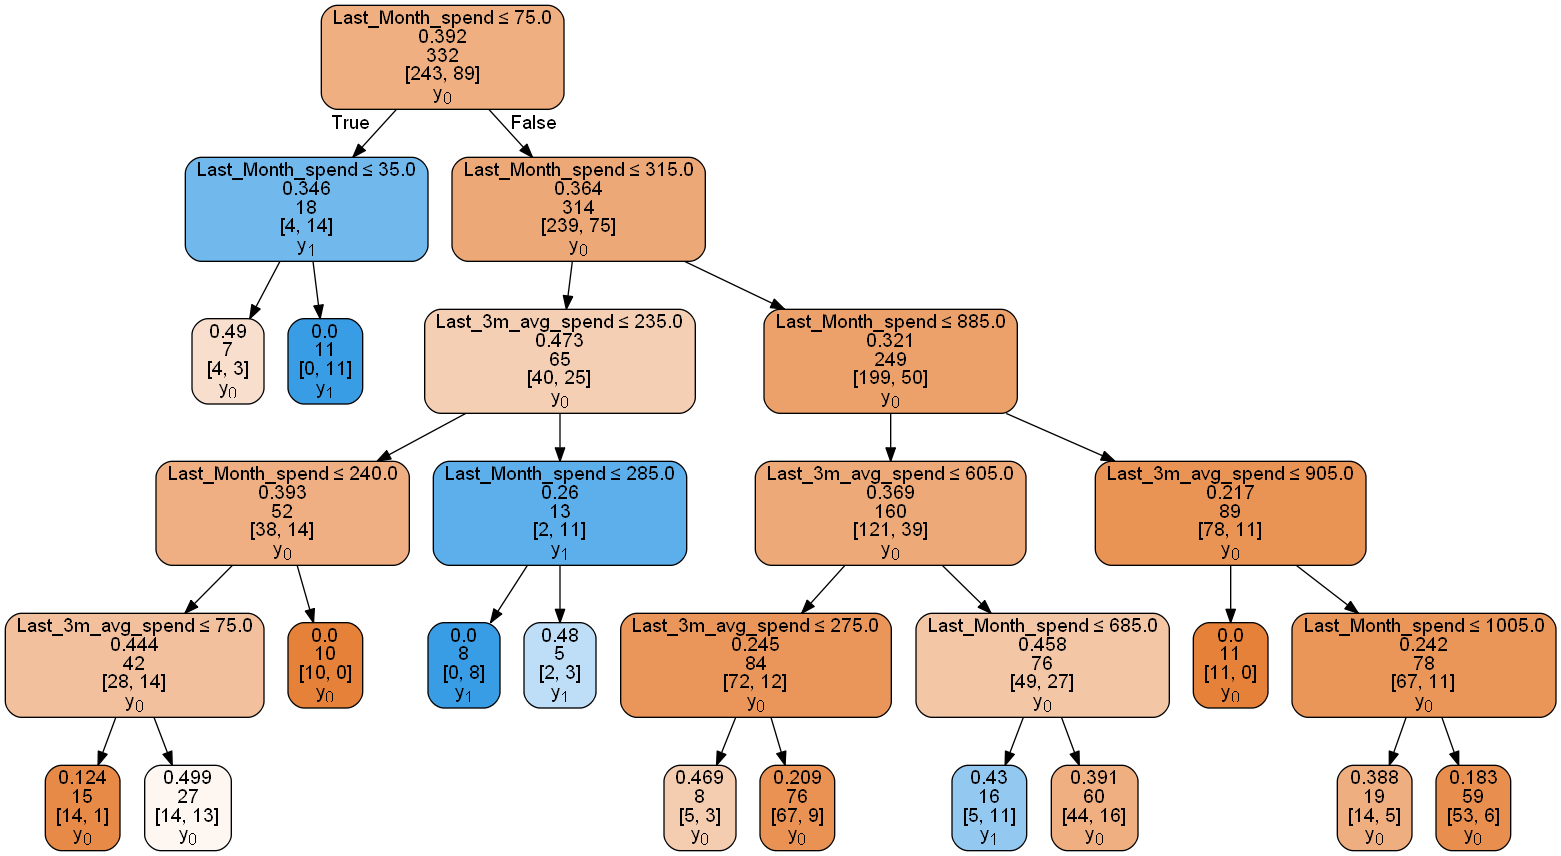

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

dot_data = StringIO()
export_graphviz(dt_train_gini , out_file=dot_data,   filled=True, rounded=True, special_characters=True, impurity=True,label=True,class_names=True,feature_names=df.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [21]:
#dt_train_gini
#http://www.webgraphviz.com/

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')